# Add Logo

Add a logo to the left of the title of a `page_navbar`.

Pay attention to line 10-17 and 26.

-   A `www` folder must be added to the root dir of the app;

-   `static_assets=app_dir / 'www'` needs to be specified as an argument
    of `app`;

-   Shiny will look for asset in this folder following the relative path
    specified in the `src` argument of `ui.tags.img`

``` python
from shiny import App, ui
from pathlib import Path

app_ui = ui.page_navbar(  
    ui.nav_panel("A", "Page A content"),  
    ui.nav_panel("B", "Page B content"),  
    ui.nav_panel("C", "Page C content"),  
    title = ui.div(
        ui.tags.img(
            src='asset/logo.png', # this image is put in the www/asset/logo.png folder
            height='40px',
            style='margin-right: 10px;',
        ),
        'App with Navbar & Logo',
    ),
    id="page",  
)  


def server(input, output, session):
    pass

app_dir = Path(__file__).parent
app = App(app_ui, server, static_assets=app_dir / 'www')
```

> **Serve local files**
>
> [`Serve local files`](https://shiny.posit.co/py/docs/ui-customize.html#serve-local-files)
>
> <br />
>
> When customizing UI with CSS (and/or JavaScript), it’s often useful to
> serve local files (e.g., fonts, images, CSS, etc) to the app. This can
> be done by providing a value for `static_assets`.
>
> <br />
>
> To make static files available for the UI in Shiny Core, use the
> `static_assets` argument of `shiny.App()`. Unlike Shiny Express, the
> `www` subdirectory is not automatically mounted at `/` but you can add
> it manually like any other static asset directory.

The code above will create the following page:

<figure>
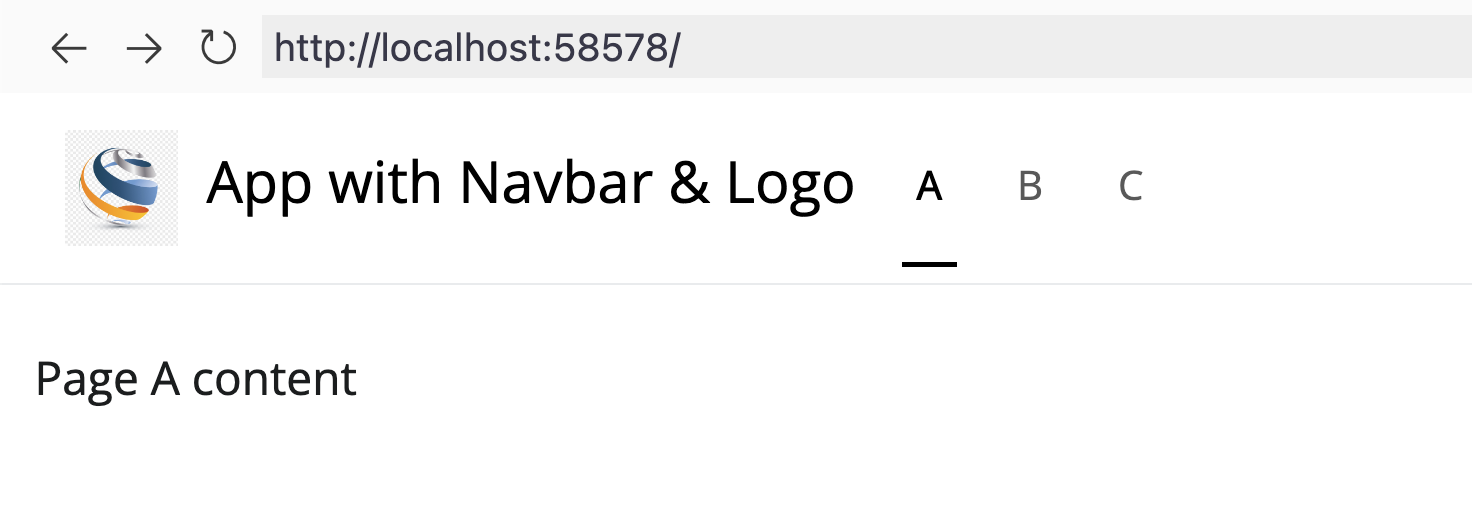
<figcaption aria-hidden="true">App with Logo</figcaption>
</figure>

# Interactive Shiny App

``` shinylive-python
#| '!! shinylive warning !!': |
#|   shinylive does not work in self-contained HTML documents.
#|   Please set `embed-resources: false` in your metadata.
#| standalone: true

from shiny import App, render, ui
import plotly.graph_objects as go
import numpy as np

app_ui = ui.page_fluid(
    ui.h2("3D Scatter Plot with Shiny"),
    ui.input_slider("n_points", "Number of points", 50, 500, 100),
    ui.input_selectize("color_scheme", "Color scheme:", 
                      choices=["Viridis", "Plasma", "Blues"]),
    ui.output_plot("plot_3d")
)

def server(input, output, session):
    @output
    @render.plot
    def plot_3d():
        n = input.n_points()
        
        # Generate random 3D data
        x = np.random.randn(n)
        y = np.random.randn(n)
        z = np.random.randn(n)
        
        fig = go.Figure(data=[go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(
                size=5,
                color=z,
                colorscale=input.color_scheme().lower(),
                showscale=True
            )
        )])
        
        fig.update_layout(
            scene=dict(
                xaxis_title='X Axis',
                yaxis_title='Y Axis',
                zaxis_title='Z Axis'
            ),
            title=f'3D Scatter Plot ({n} points)'
        )
        
        return fig

app = App(app_ui, server)
```